# reads pickled matplotlib objects

In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
# from matplotlib import rc
# rc('figure', autolayout=True, figsize=[16, 9], dpi=125, titlesize=20 )
# rc('font', family='monospace')
# rc('axes', titlesize=20, titleweight='heavy', labelsize=16, labelweight='bold')
# rc(('xtick', 'ytick'), labelsize = 18)
# rc('legend', fontsize=14)

loading pickled figures

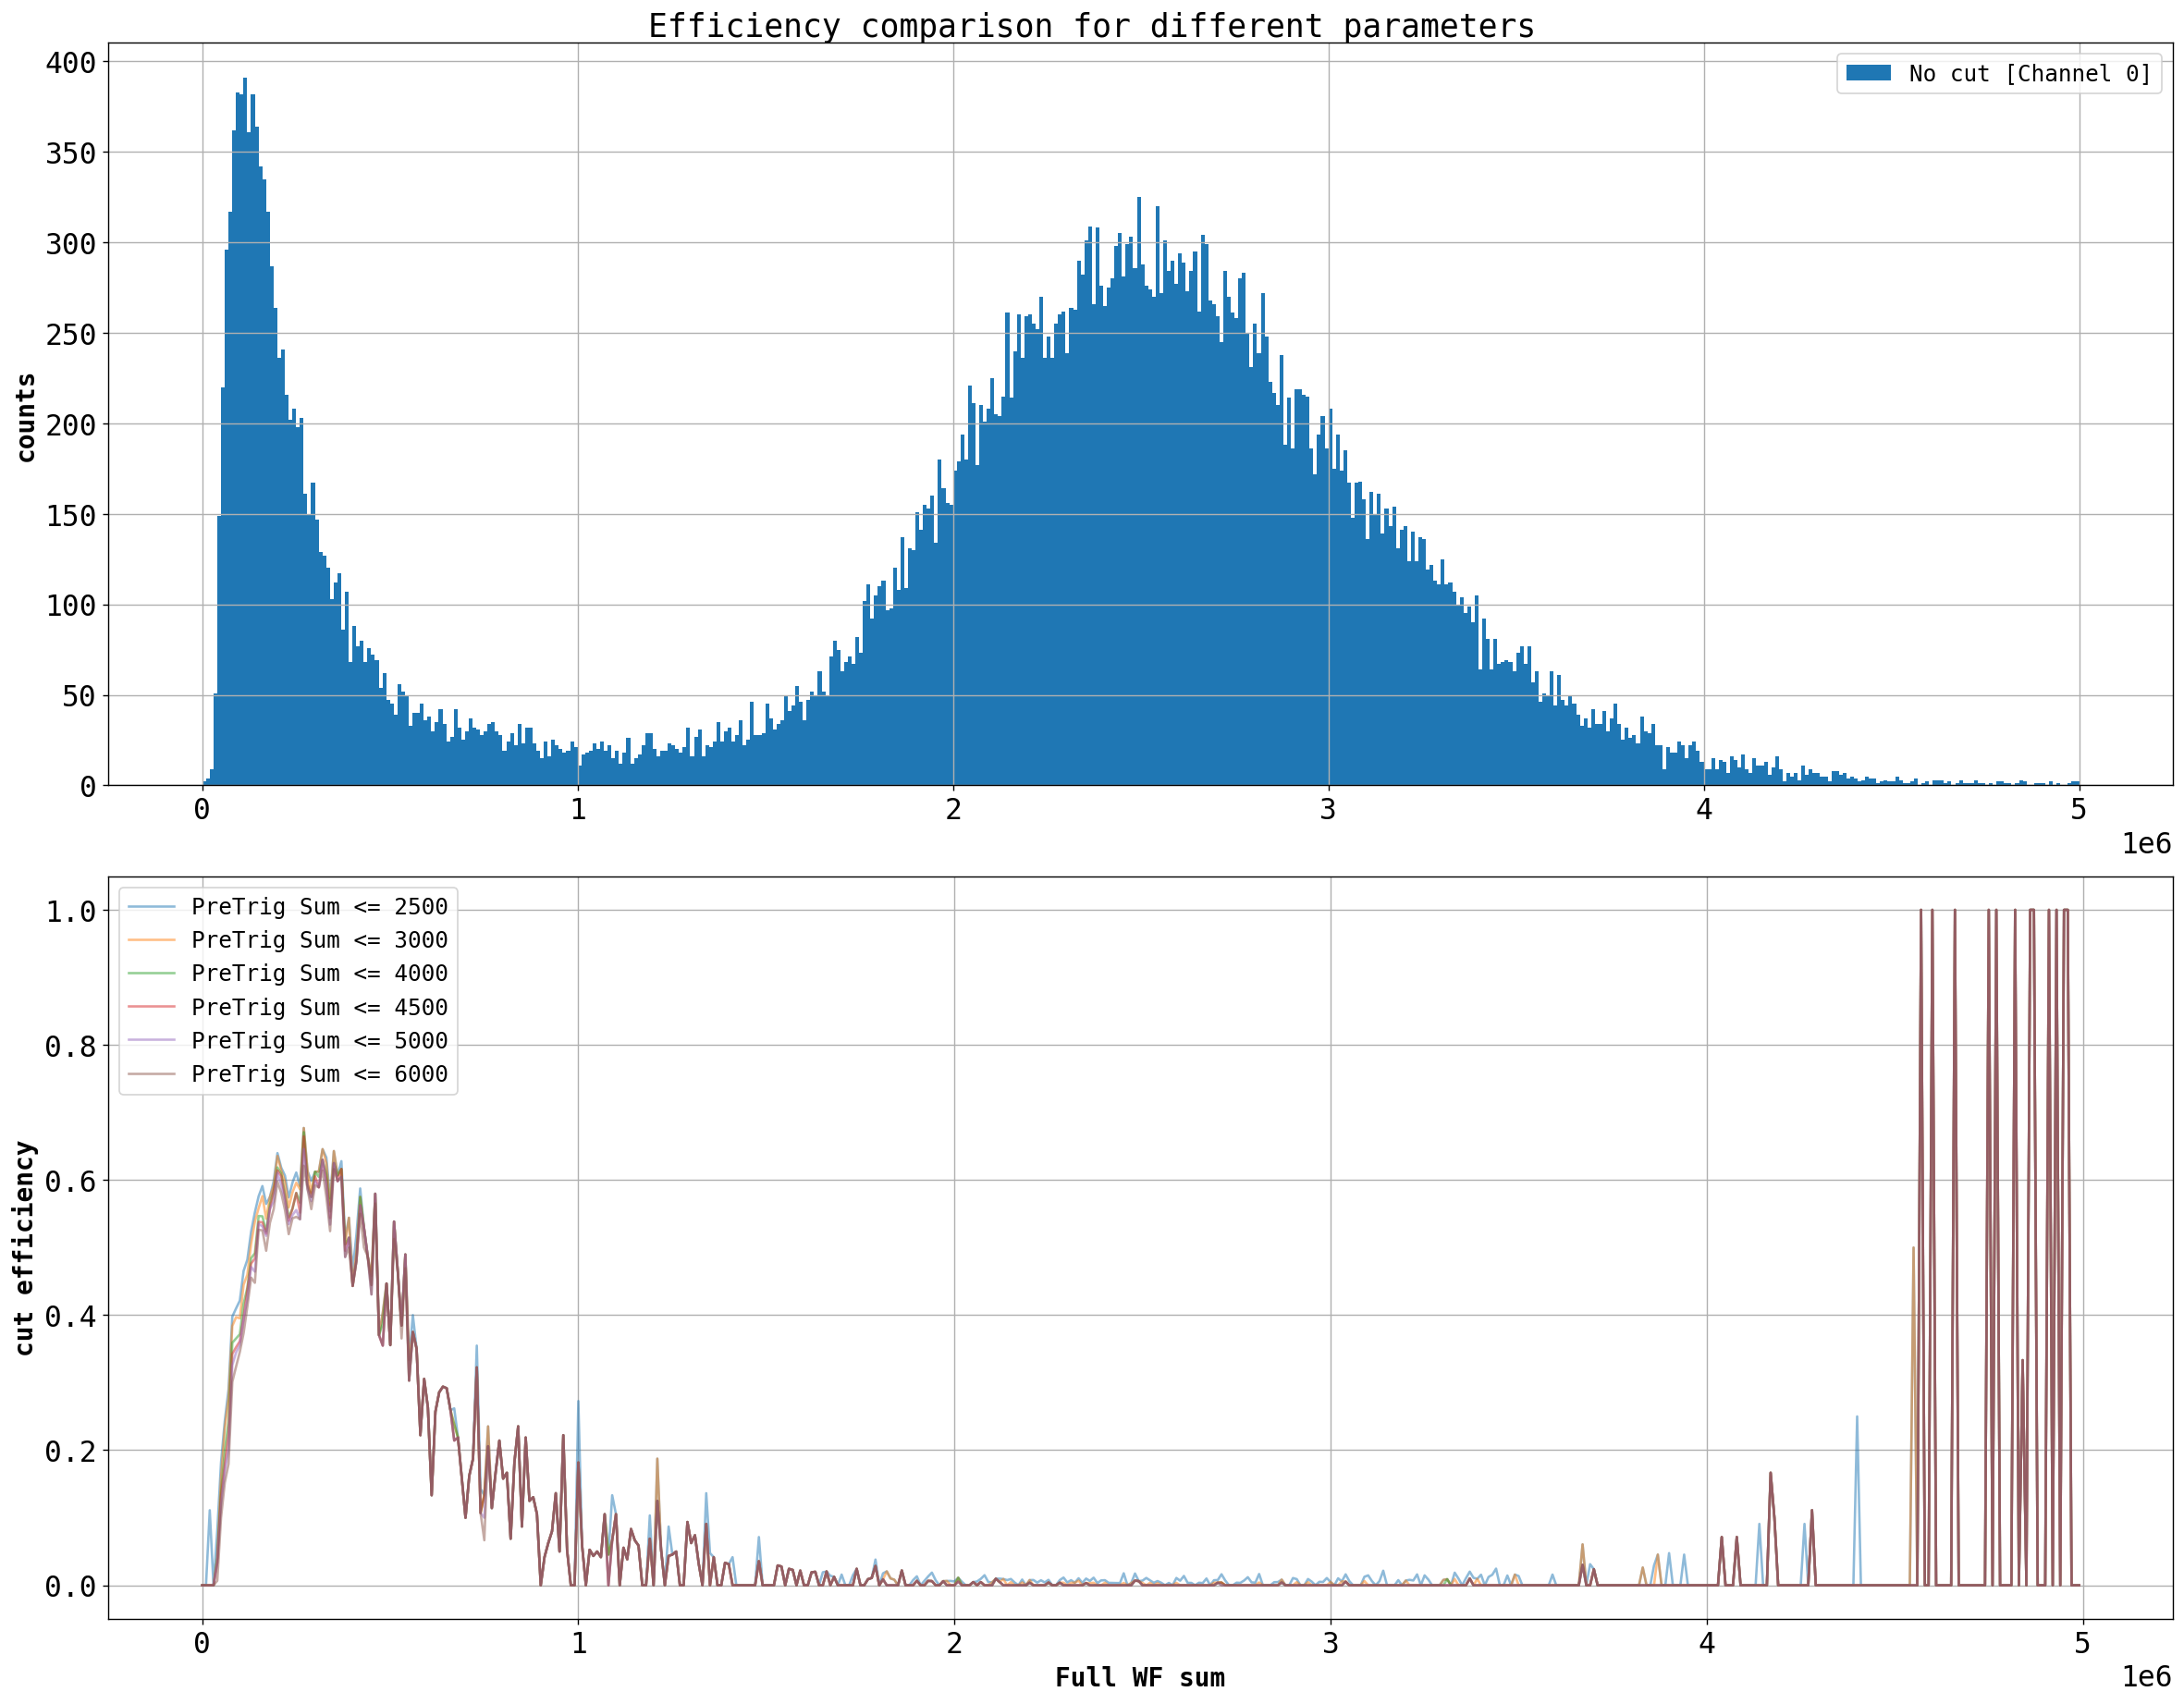

In [3]:
fig_file = pickle.load(open('../output/00126_part_output/cut1_eff_comparison.pkl', 'rb'))

In [4]:
fig_file.axes[1].lines[0].get_data()

(array([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,
          60000.,   70000.,   80000.,   90000.,  100000.,  110000.,
         120000.,  130000.,  140000.,  150000.,  160000.,  170000.,
         180000.,  190000.,  200000.,  210000.,  220000.,  230000.,
         240000.,  250000.,  260000.,  270000.,  280000.,  290000.,
         300000.,  310000.,  320000.,  330000.,  340000.,  350000.,
         360000.,  370000.,  380000.,  390000.,  400000.,  410000.,
         420000.,  430000.,  440000.,  450000.,  460000.,  470000.,
         480000.,  490000.,  500000.,  510000.,  520000.,  530000.,
         540000.,  550000.,  560000.,  570000.,  580000.,  590000.,
         600000.,  610000.,  620000.,  630000.,  640000.,  650000.,
         660000.,  670000.,  680000.,  690000.,  700000.,  710000.,
         720000.,  730000.,  740000.,  750000.,  760000.,  770000.,
         780000.,  790000.,  800000.,  810000.,  820000.,  830000.,
         840000.,  850000.,  860000.,  870000., 

In [5]:
fig_file.axes[1].get_ylabel()

'cut efficiency'

In [6]:
fig_file.axes[1].get_xlabel()

'Full WF sum'

In [7]:
fig_file.axes[1].lines[0].get_label()

'PreTrig Sum <= 2500'

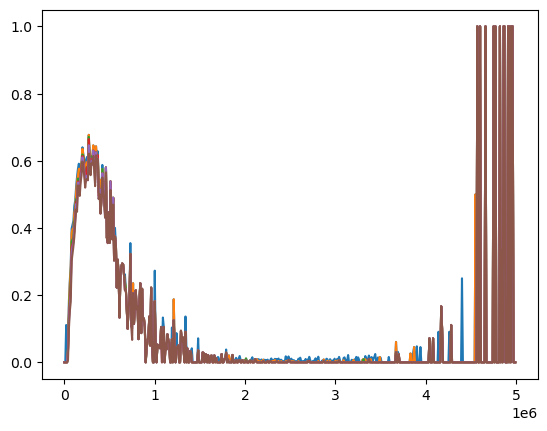

In [8]:
plt.figure()
for line in fig_file.axes[1].lines:
    plt.plot(line.get_data()[0], line.get_data()[1])
